对数据集进行预测并导出cvs

In [1]:
import h5py
import numpy as np
import pandas as pd
from keras.callbacks import TensorBoard
from keras.models import load_model
import os

import cv2
import matplotlib.pyplot as plt

Using TensorFlow backend.
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


获取算法模型和数据特征

In [2]:
test_features = []
test_file_que = []
with h5py.File("modelfile/xception_bottleneck.h5", 'r') as h:
    test_features.append(np.array(h['test_features']))
    test_file_que.append(np.array(h['test_file_que']))
model = load_model('modelfile/model.h5')
model.load_weights('modelfile/weights-epoch_15.h5')

In [3]:
print(np.shape(test_file_que))

(1, 12500)


获取文件顺序

In [4]:
file_lst = []
for file in test_file_que[0]:
    file_lst.append(file.decode())

In [5]:
test_pred = model.predict(test_features, batch_size=None, verbose=1, steps=None)
test_pred = test_pred.clip(min=0.005, max=0.995)

12500/12500 [==============================] - 1s 50us/step


打印前面5个的预测

In [6]:
print(test_pred[:5].reshape(1,5))

[[ 0.995  0.005  0.005  0.995  0.995]]


In [7]:
df = pd.read_csv("prediction/sample_submission.csv")

In [8]:
for i,file in enumerate(file_lst):
    cnt = -1
    cnt =int(os.path.split(file)[-1].split(".")[0])
    df.loc[cnt-1,'label'] = test_pred[i]


导出预测结果提供上传：  
kaggle competitions submit -c dogs-vs-cats-redux-kernels-edition -f pred_test.csv -m "turbo5, lr=0.005,momentum=0.8, epochs=15"

In [9]:
df.to_csv('prediction/pred_test.csv', index=False)

打印

In [10]:
window_l = list(np.where(test_pred>0.4)[0])
window_r = list(np.where(test_pred<0.6)[0])
cannot_pred = list(set(window_l).intersection(set(window_r)))

In [11]:
print(len(cannot_pred))
print(cannot_pred)

18
[11582, 2434, 9346, 9474, 11557, 11973, 3175, 3614, 2701, 7470, 2799, 10141, 3166, 1146, 3964, 7261, 478, 671]


In [12]:
def showimg(img,title):
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')
    plt.show()

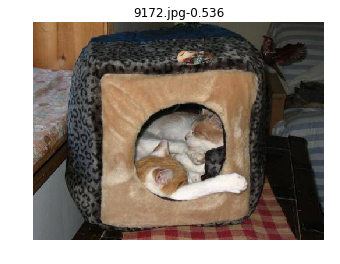

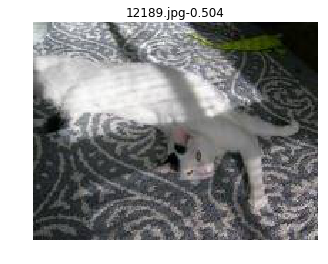

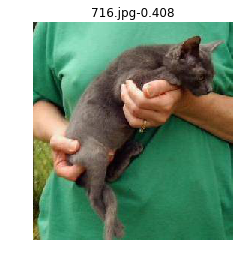

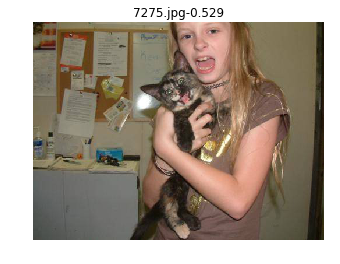

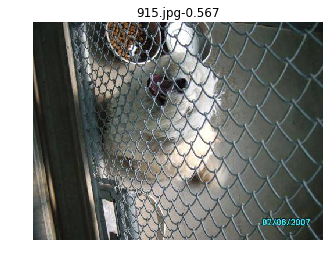

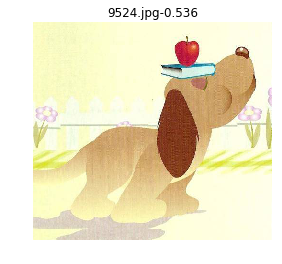

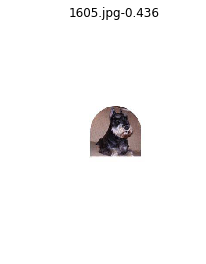

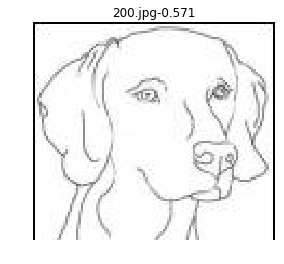

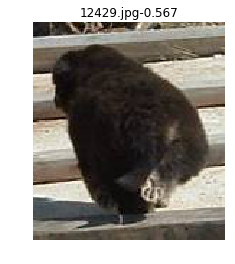

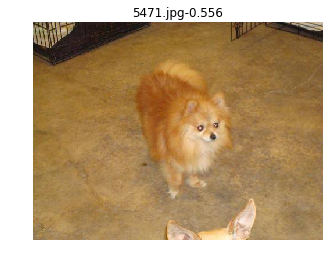

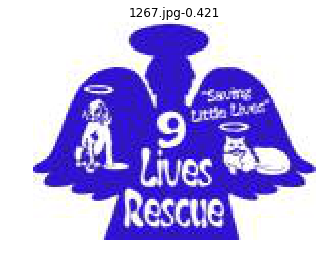

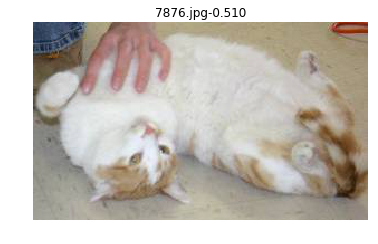

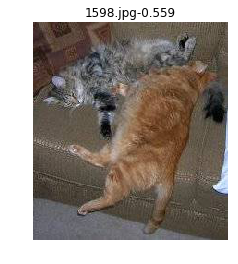

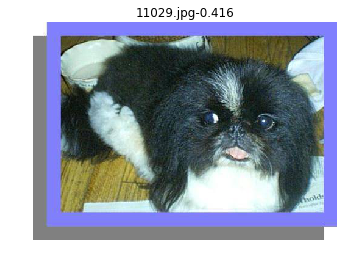

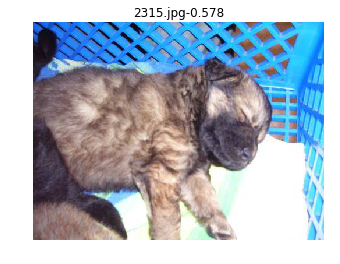

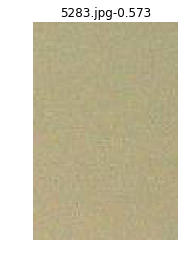

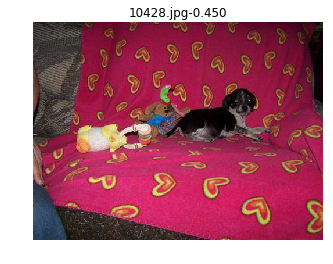

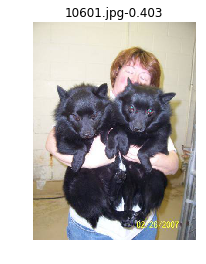

In [13]:
nb = 0
for i in cannot_pred:
    file = file_lst[i]
    fname = os.path.split(file)[-1] + "-" + str("%.3f"%float(test_pred[i]))
    img = cv2.imread(file)[:,:,::-1]
    showimg(img,fname)